In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
dataset = pd.read_csv("data.csv")

In [3]:
dataset.shape[0] #кол-во строк

21525

In [4]:
dataset.shape[1] #кол-во столбцов

12

In [5]:
dataset.head() #первые 5 строк

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [6]:
dataset.describe(include = "all") #вычисляет среднее значение, стандартное отклонение, минимальное значение, максимальное значение,
#include = "all" - покозывает также строки с пропущенными значениями
#unique - cколько уникальных значений в наборе данных
#top значения
#freg -  частота появления значений

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,1.935100e+04,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,среднее,NaN,женат / замужем,NaN,F,сотрудник,NaN,NaN,свадьба
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,1.674223e+05,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,1.029716e+05,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,2.066726e+04,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,1.030532e+05,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,1.450179e+05,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,2.034351e+05,NaN


In [7]:
dataset.info() #сколько значений в каждом столбце пропущенных значений и формат данных
#индекс, столбцы и тип данных, ненулевые значения и использование памяти

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


<AxesSubplot:>

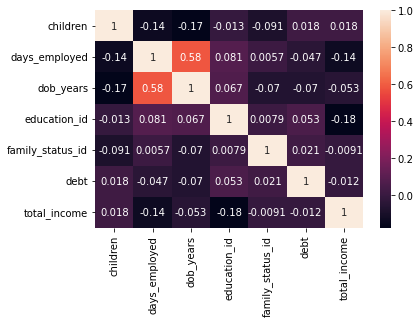

In [8]:
corr = dataset.corr() #корреляционная матрица
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True) # тепловая карта корреляционной матрицы

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


<AxesSubplot:>

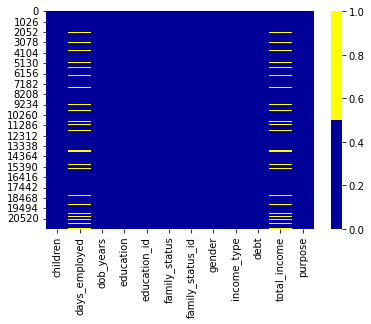

In [9]:
# количество пропущенных значений в каждом столбце
print(dataset.isna().sum())

colours = ['#000099', '#ffff00'] 
sns.heatmap(dataset.isna(), cmap=sns.color_palette(colours)) # тепловая карта пропущенных значений

<AxesSubplot:>

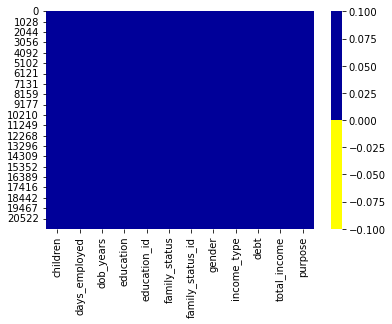

In [10]:
# проверяем что все пропущенные значения у одних и тех же людей
not_nan = dataset.drop(np.where(dataset['days_employed'].isnull() & dataset['total_income'].isnull())[0]) # убираем пропущенные значения

colours = ['#ffff00', '#000099'] 
sns.heatmap(not_nan.isna(), cmap=sns.color_palette(colours))
# Как видно из тепловой карты, пропущенные значения действительно были у одних и тех же людей

In [11]:
dataset["education"] = dataset["education"].apply(lambda x:x.lower())
# значения в столбце с количеством их вхождений
col = dataset.columns
for el in col:
    print(el, "\n", dataset[el].value_counts())

children 
  0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64
days_employed 
 -8437.673028      1
-3507.818775      1
 354500.415854    1
-769.717438       1
-3963.590317      1
                 ..
-1099.957609      1
-209.984794       1
 398099.392433    1
-1271.038880      1
-1984.507589      1
Name: days_employed, Length: 19351, dtype: int64
dob_years 
 35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8

In [12]:
# Нормализируем категориальные данные
pattern = {"свадьб": "свадьба", "недвижимост": "жильё", "жиль": "жильё", "автомобил": "автомобиль", "образован": "образование"} # паттерны (корни) слов, которые объединяют схожие данные в одни
for pat in pattern.keys():
    print("-"*8, "\n", pat, "\n", dataset[dataset["purpose"].str.contains(pat)]["purpose"].value_counts()) # номральизация категориальных данных столбца с целью кредита

-------- 
 свадьб 
 свадьба                  797
на проведение свадьбы    777
сыграть свадьбу          774
Name: purpose, dtype: int64
-------- 
 недвижимост 
 операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с коммерческой недвижимостью     651
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
строительство недвижимости                620
покупка жилой недвижимости                607
Name: purpose, dtype: int64
-------- 
 жиль 
 операции с жильем          653
покупка жилья для сдачи    653
покупка жилья              647
жилье                      647
покупка жилья для семьи    641
покупка своего жилья       620
ремонт жилью               612
Name: purpose, dtype: int64
-------- 
 автомобил 
 на покупку своего автомобиля          505
автомобиль              

In [13]:
# Проверка что мы нормализовали данные
for pat, val in pattern.items():
    dataset.loc[dataset["purpose"].str.contains(pat, case=False), "purpose"] = val
print(dataset["purpose"].value_counts())
dataset

жильё          10840
автомобиль      4315
образование     4022
свадьба         2348
Name: purpose, dtype: int64


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,жильё
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,автомобиль
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,жильё
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,свадьба
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,жильё
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,автомобиль
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,жильё
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,автомобиль


In [14]:
dataset["children"] = dataset["children"].apply(lambda x: abs(x))
dataset.loc[dataset["children"] == 20, "children"] = 2

dataset["children"].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [15]:
dataset["days_employed"] = dataset["days_employed"].apply(lambda x: abs(x) / 30 / 365)

dataset["days_employed"]

0         0.770564
1         0.367562
2         0.513555
3         0.376689
4        31.074527
           ...    
21520     0.413636
21521    31.409809
21522     0.193000
21523     0.284245
21524     0.181234
Name: days_employed, Length: 21525, dtype: float64

<AxesSubplot:>

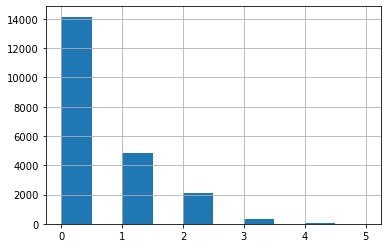

In [16]:
dataset["children"].hist() #кол-во детей в семье

<AxesSubplot:>

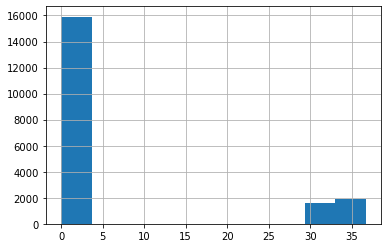

In [17]:
dataset["days_employed"].hist() #общий трудовой стаж в годах

<AxesSubplot:>

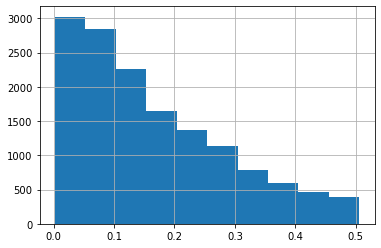

In [18]:
dataset[(dataset["days_employed"] < dataset["days_employed"].quantile(0.75))]["days_employed"].hist() #трудовой стаж меньше нуля

<AxesSubplot:>

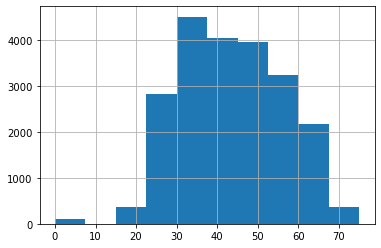

In [19]:
dataset["dob_years"].hist() #возраст клиента в годах

<AxesSubplot:>

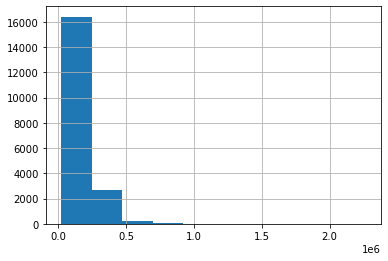

In [20]:
dataset["total_income"].hist()

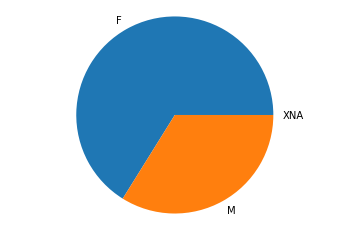

In [21]:
values = []
labels = []
for i, v in dataset["gender"].value_counts().items():
    labels.append(i)
    values.append(v)

plt.pie(values,labels=labels)
plt.axis('equal')
plt.show()

In [22]:
# пример избавления от аномальных величин с помощью квантилей (не особо корректно)
q_low = dataset["days_employed"].quantile(0.01)
q_hi  = dataset["days_employed"].quantile(0.99)

df_filtered = dataset[(dataset["days_employed"] < q_hi) & (dataset["days_employed"] > q_low)]
df_filtered.shape

(18963, 12)

In [23]:
for el in col:
    print(el, "\n", f"{round(dataset[dataset[el] == 0][el].count() / dataset[el].count(), 4) * 100}%")

children 
 65.73%
days_employed 
 0.0%
dob_years 
 0.47000000000000003%
education 
 0.0%
education_id 
 24.44%
family_status 
 0.0%
family_status_id 
 57.50999999999999%
gender 
 0.0%
income_type 
 0.0%
debt 
 91.91%
total_income 
 0.0%
purpose 
 0.0%


In [24]:
vars(dataset[dataset["dob_years"] == 0]["income_type"].value_counts())
i = 0
for el in dataset[dataset["dob_years"] == 0]["income_type"].value_counts()._index:
    print(f"{el} - {round((dataset[dataset['dob_years'] == 0]['income_type'].value_counts()[i]) / dataset.shape[0], 4) * 100}%")
    i += 1

сотрудник - 0.26%
пенсионер - 0.09%
компаньон - 0.09%
госслужащий - 0.03%


In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV

dataset0 = dataset[dataset["debt"] == 0] 
dataset1 = dataset[dataset["debt"] == 1] 

dataset0 = dataset0[: len(dataset1)]

dataset_fin = dataset0.append(dataset1, ignore_index=True)

X = dataset_fin.drop("debt", axis=1)
y = dataset_fin['debt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

def pipeline_types():
    numeric_features = [
        'children', 
        'days_employed', 
        'dob_years',
        'education_id',
        'family_status_id', 
        'total_income',
    ]
    categorical_features = [
        'education',
        'family_status',
        'gender',
        'income_type',
        'purpose',
    ]

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    transformer = ColumnTransformer(transformers=[
        ('numeric_data_preprocessing', numeric_transformer, numeric_features),
        ('categorical_data_preprocessing', categorical_transformer, categorical_features)
    ])
    #Трубопровод трансформаций с окончательным оценщиком.
    return Pipeline(steps=[
        ('transformer', transformer),
        ('rf_estimator', RandomForestClassifier()),
    ])

pipeline = pipeline_types()

pipeline.fit(X_train, y_train)

prediction = pipeline.predict(X_test)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.52      0.53      0.52       353
           1       0.51      0.50      0.51       344

    accuracy                           0.52       697
   macro avg       0.51      0.51      0.51       697
weighted avg       0.51      0.52      0.52       697



In [27]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model, Sequential

In [28]:
def trasform_column():
    numeric_features = [
        'children', 
        'days_employed', 
        'dob_years',
        'education_id',
        'family_status_id', 
        'total_income',
    ]
    categorical_features = [
        'education',
        'family_status',
        'gender',
        'income_type',
        'purpose',
    ]

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    transformer = ColumnTransformer(transformers=[
        ('numeric_data_preprocessing', numeric_transformer, numeric_features),
        ('categorical_data_preprocessing', categorical_transformer, categorical_features)
    ])
    return transformer


transformer = trasform_column()
X = transformer.fit_transform(X)
labels = pd.get_dummies(dataset_fin["debt"], prefix='condition')
y = labels.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
model = Sequential()
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(5, activation='relu')(dense_layer_2)
dense_layer_4 = Dense(10, activation='relu')(dense_layer_3)
output = Dense(y.shape[1], activation='softmax')(dense_layer_4)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [30]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(30, activation='relu')(input_layer)
dense_layer_2 = Dense(30, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
dense_layer_4 = Dense(15, activation='relu')(dense_layer_3)
output = Dense(y.shape[1], activation='softmax')(dense_layer_4)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [31]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 27)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 30)                840       
_________________________________________________________________
dense_6 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_7 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_8 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 32        
Total params: 2,967
Trainable params: 2,967
Non-trainable params: 0
_________________________________________________________

In [32]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

22/22 [==============================] - 0s 952us/step - loss: 2129.9348 - acc: 0.4749
Test Score: 2129.934814453125
Test Accuracy: 0.47489240765571594


In [33]:
history = model.fit(X_train, y_train, batch_size=15, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
149/149 [==============================] - 1s 2ms/step - loss: 83.8085 - acc: 0.4852 - val_loss: 33.8014 - val_acc: 0.5081
Epoch 2/50
149/149 [==============================] - 0s 2ms/step - loss: 54.4153 - acc: 0.4919 - val_loss: 23.9499 - val_acc: 0.5081
Epoch 3/50
149/149 [==============================] - 0s 1ms/step - loss: 34.6445 - acc: 0.5121 - val_loss: 23.3591 - val_acc: 0.5081
Epoch 4/50
149/149 [==============================] - 0s 1ms/step - loss: 35.0330 - acc: 0.4942 - val_loss: 15.7434 - val_acc: 0.5081
Epoch 5/50
149/149 [==============================] - 0s 2ms/step - loss: 36.6985 - acc: 0.4852 - val_loss: 0.9762 - val_acc: 0.4919
Epoch 6/50
149/149 [==============================] - 0s 1ms/step - loss: 49.4875 - acc: 0.4982 - val_loss: 69.6255 - val_acc: 0.5081
Epoch 7/50
149/149 [==============================] - 0s 2ms/step - loss: 72.5453 - acc: 0.5072 - val_loss: 4.1903 - val_acc: 0.5099
Epoch 8/50
149/149 [==============================] - 0s 2ms/ste

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV

dataset0 = dataset[dataset["debt"] == 0] 
dataset1 = dataset[dataset["debt"] == 1] 

dataset0 = dataset0[: len(dataset1)]

dataset_fin = dataset0.append(dataset1, ignore_index=True)

X = dataset_fin.drop("debt", axis=1)
y = dataset_fin['debt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
X = transformer.fit_transform(X)
labels = pd.get_dummies(dataset_fin["debt"], prefix='condition')
y = labels.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(RandomForestClassifier(), 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 200,
 'min_samples_split': 12,
 'min_samples_leaf': 50,
 'max_features': 'log2',
 'max_depth': 9,
 'bootstrap': True}

In [37]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,200,12,50,log2,9,True,0.612210,1
1,400,50,50,sqrt,6,False,0.611494,2
2,200,7,44,sqrt,10,False,0.610416,3
3,100,18,23,log2,10,True,0.610415,4
4,300,39,2,sqrt,3,True,0.610057,5
5,500,28,50,sqrt,9,False,0.610057,5
6,600,39,34,log2,13,True,0.610055,7
7,200,7,44,sqrt,11,False,0.609697,8
8,100,2,34,log2,10,False,0.609338,9
9,200,44,34,log2,14,True,0.608979,10


In [38]:
model_search = RandomForestClassifier(
    n_estimators= 800,
    min_samples_split= 28,
    min_samples_leaf= 39,
    max_features= 'log2',
    max_depth= 11,
    bootstrap= True
)

model_search.fit(X_train, y_train)

prediction = model_search.predict(X_test)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.59      0.58      0.59       353
           1       0.58      0.59      0.58       344

   micro avg       0.59      0.59      0.59       697
   macro avg       0.59      0.59      0.59       697
weighted avg       0.59      0.59      0.59       697
 samples avg       0.59      0.59      0.59       697



In [39]:
dataset0 = dataset[dataset["debt"] == 0] 
dataset1 = dataset[dataset["debt"] == 1] 

dataset0 = dataset0[: len(dataset1)]

dataset_fin = dataset0.append(dataset1, ignore_index=True)

X = dataset_fin.drop("debt", axis=1)
y = dataset_fin['debt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
from xgboost import XGBClassifier
def pipeline_types1():
    numeric_features = [
        'children', 
        'days_employed', 
        'dob_years',
        'education_id',
        'family_status_id', 
        'total_income',
    ]
    categorical_features = [
        'education',
        'family_status',
        'gender',
        'income_type',
        'purpose',
    ]

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    transformer = ColumnTransformer(transformers=[
        ('numeric_data_preprocessing', numeric_transformer, numeric_features),
        ('categorical_data_preprocessing', categorical_transformer, categorical_features)
    ])
    #Трубопровод трансформаций с окончательным оценщиком.
    return Pipeline(steps=[
        ('transformer', transformer),
        ('rf_estimator', XGBClassifier()),
    ])

xgbc = pipeline_types1()
xgbc.fit(X_train, y_train)
prediction = xgbc.predict(X_test)

print(classification_report(y_test, prediction))

[22:23:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.56      0.53      0.55       343
           1       0.57      0.60      0.58       354

    accuracy                           0.57       697
   macro avg       0.57      0.56      0.56       697
weighted avg       0.57      0.57      0.56       697

